In [14]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [15]:
# load dataset 
(x_train,y_train) , (x_test,y_test) = keras.datasets.cifar10.load_data()

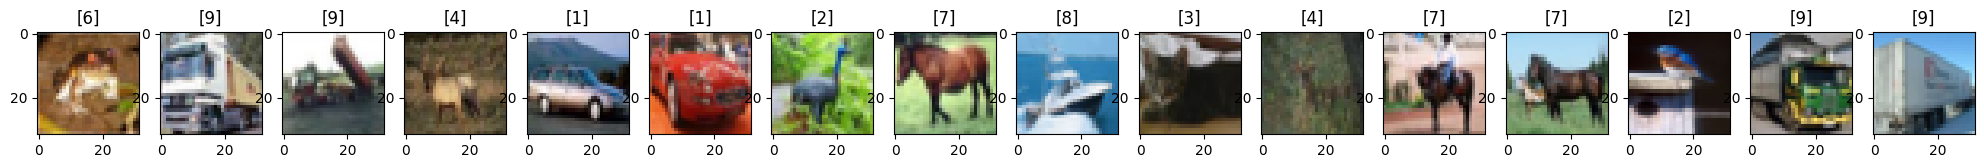

In [16]:
# show dataset  -- class vectors
plt.figure(figsize=(25,4))
for i in range(16):
    plt.subplot(1,16,i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])

In [17]:
# convert class vectors to binary class matrices with keras methods
num_classes = 10
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

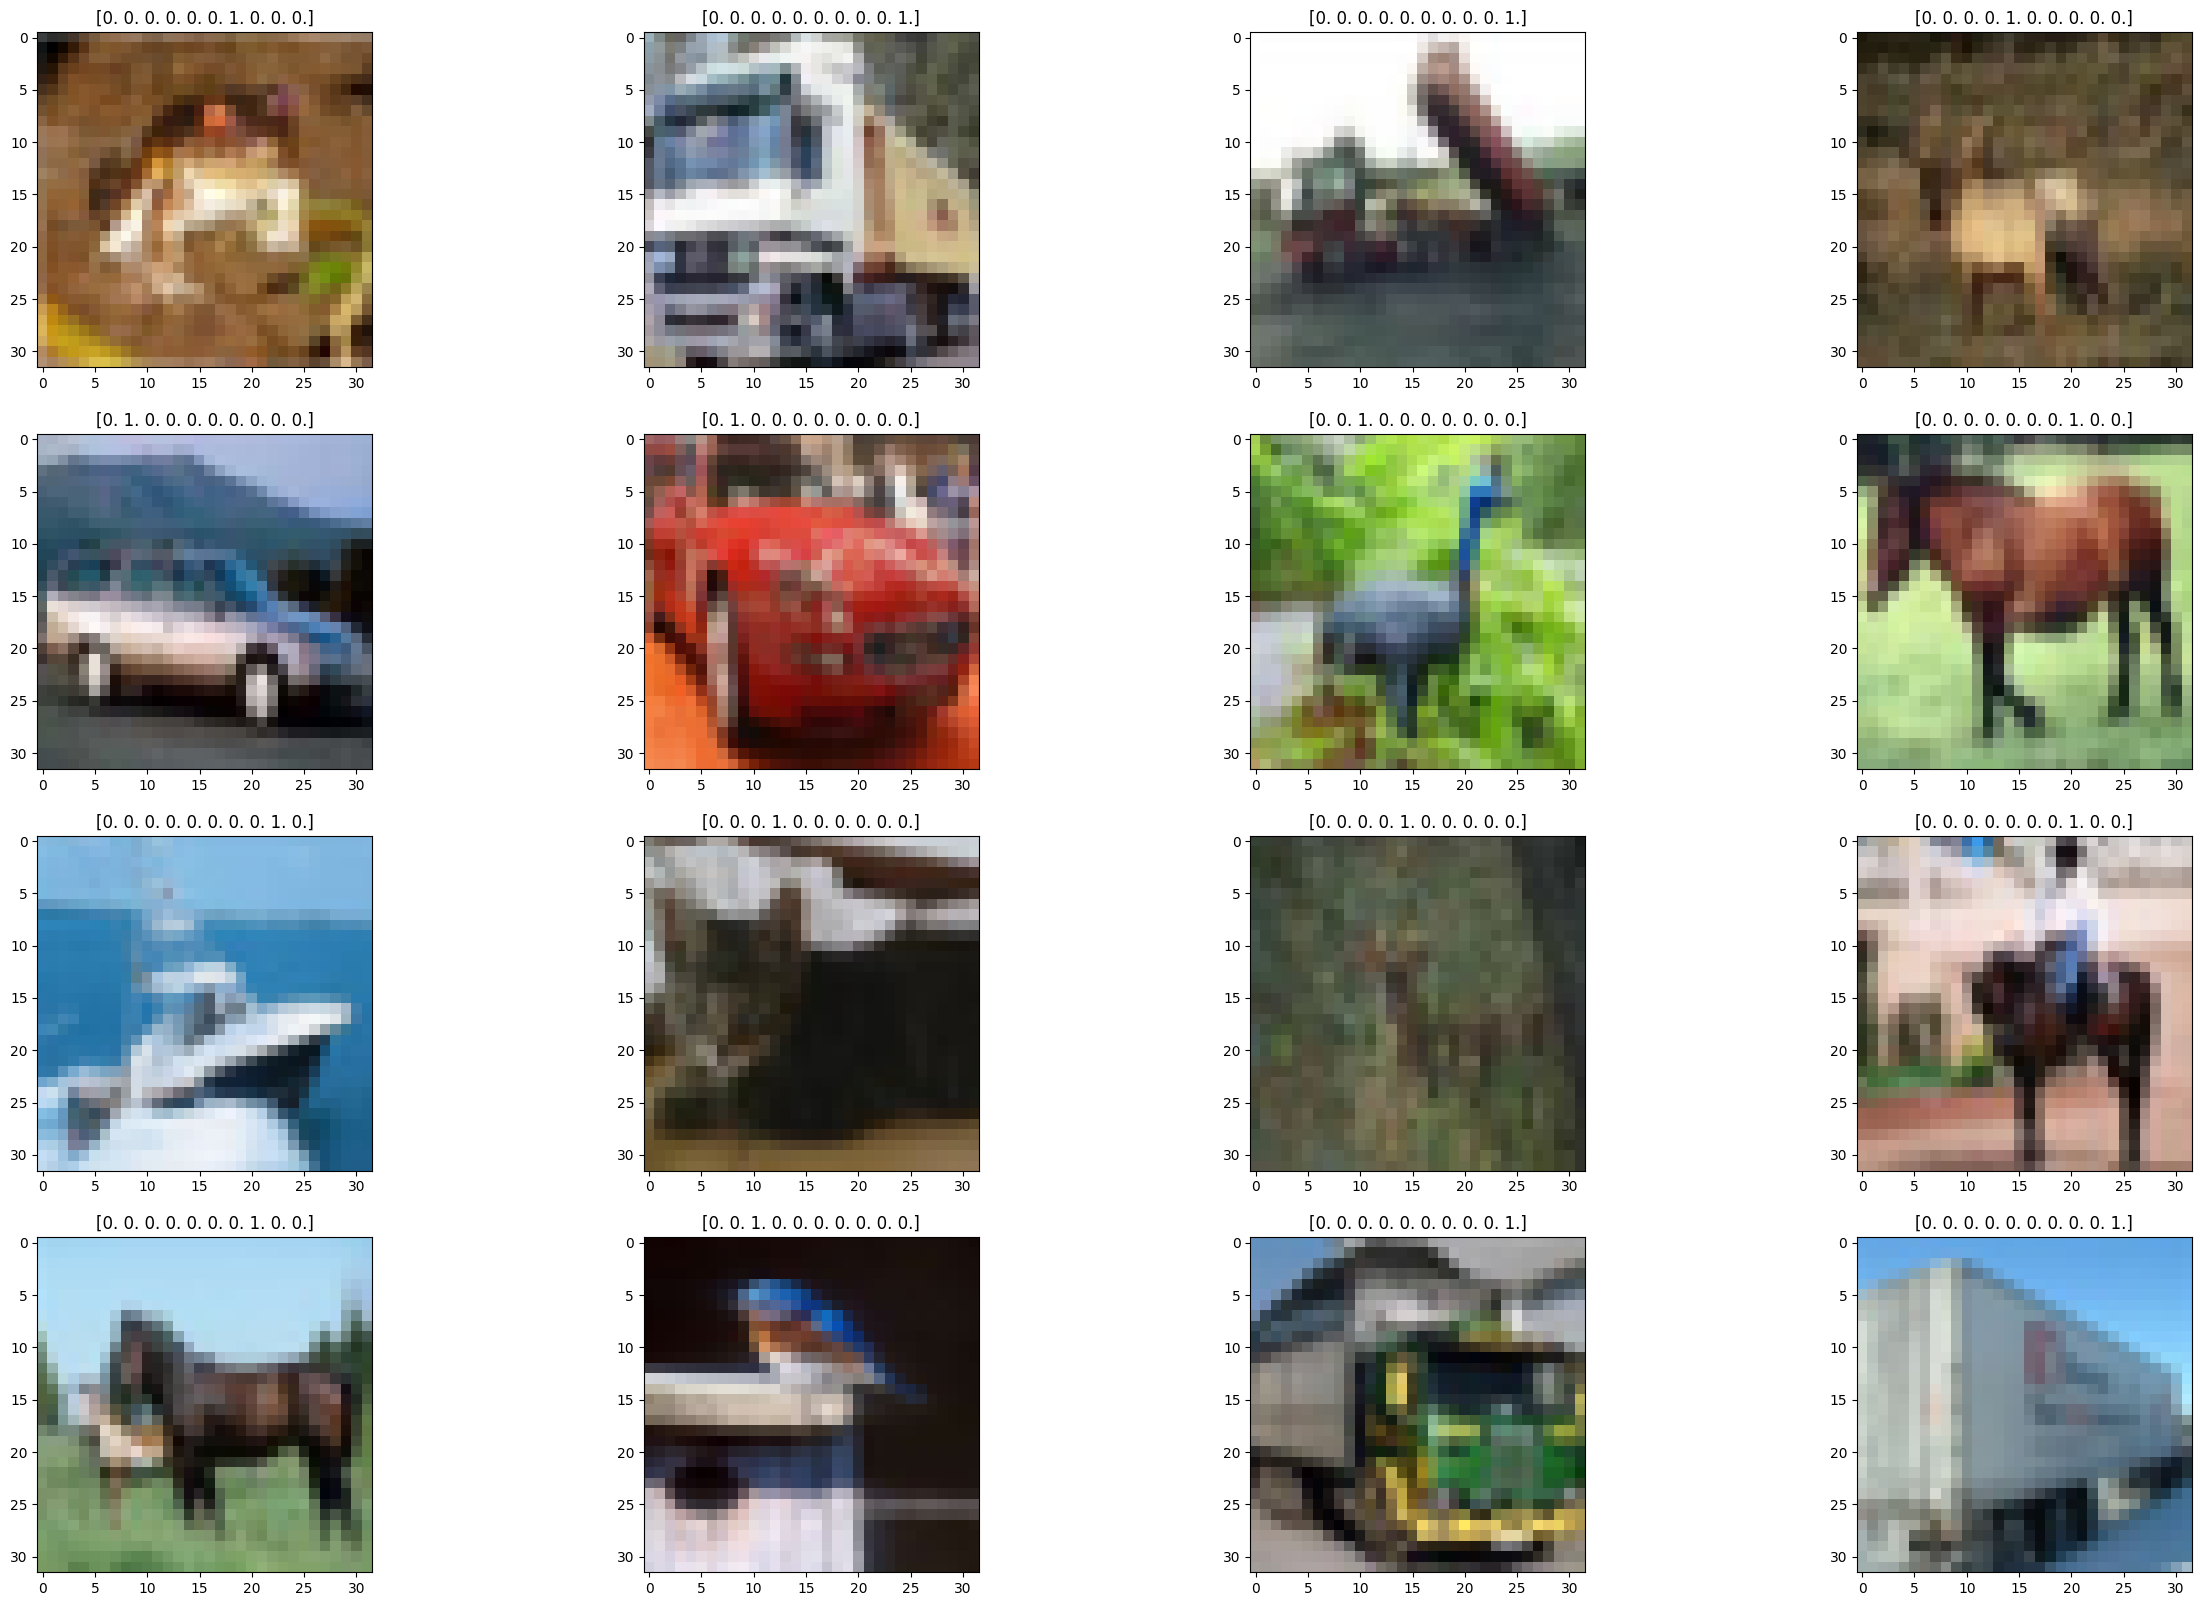

In [18]:
# show dataset - binary class matrices
plt.figure(figsize=(30,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])

In [25]:
# define model 
# units in deep layer are count of neurons to found the feature of any image of dataset
# units in last layer are just 10 classes for output of model 
def define_model(data_shape,num_layers):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=data_shape))
    model.add(keras.layers.Flatten())
    for i in range(num_layers):
        model.add(keras.layers.Dense(units=512,activation='relu'))
    model.add(keras.layers.Dense(units=num_classes,activation="softmax"))
    return model

In [30]:
# # evaluate models with train and validation  loss & acuuracy rate in any layers
# train_loss = []
# valid_loss = []
# train_acc = []
# valid_acc = []

# for layers in range(0,5):
#     model = define_model(x_train[0].shape,layers)

#     # compile model 
#     opti = keras.optimizers.Adam(learning_rate = 0.0001)
#     model.compile(loss="categorical_crossentropy", optimizer=opti, metrics=['accuracy'])


#     # train model 
#     history = model.fit(x_train,y_train,batch_size=200,epochs=4,
#                         validation_data=(x_test,y_test),
#                         shuffle=True,verbose=0)
#     # append data accuracy and loss rate to lists
#     train_loss.append(history.history['loss'][-1])
#     valid_loss.append(history.history['val_loss'][-1])
#     train_acc.append(history.history['accuracy'][-1])
#     valid_acc.append(history.history['val_accuracy'][-1])

#     # print data from accuracy level in any layer compile 
#     print('layesrs = {}, train_accuracy = {:4f},validation_accuracy = {:4f}'.format(layers+1,train_acc,valid_acc))

# evaluate models
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []
for num_layers in range(0, 21):
    model = define_model(x_train[0].shape, num_layers)

    # compile model
    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # train model
    history = model.fit(x_train, y_train,
                        batch_size=200,
                        epochs=20,
                        validation_data=(x_test, y_test),
                        shuffle=True,
                        verbose=0)
  
    #
    train_loss.append(history.history['loss'][-1])
    valid_loss.append(history.history['val_loss'][-1])
    train_acc.append(history.history['accuracy'][-1])
    valid_acc.append(history.history['val_accuracy'][-1])

    print('layers = {}, params = {}, train_acc = {:4f}, val_acc = {:4f}'.format(num_layers+1, model.count_params(), train_acc[-1], valid_acc[-1]))

layers = 1, params = 30730, train_acc = 0.283380, val_acc = 0.274900


KeyboardInterrupt: 